In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('Covid_Influenza.csv')

In [65]:
unique_age_values = df["Age Group"].unique()
print(unique_age_values)


['All Ages' 'Under 1 year' '0-17 years' '1-4 years' '5-14 years'
 '15-24 years' '18-29 years' '25-34 years' '30-39 years' '35-44 years'
 '40-49 years' '45-54 years' '50-64 years' '55-64 years' '65-74 years'
 '75-84 years' '85 years and over']


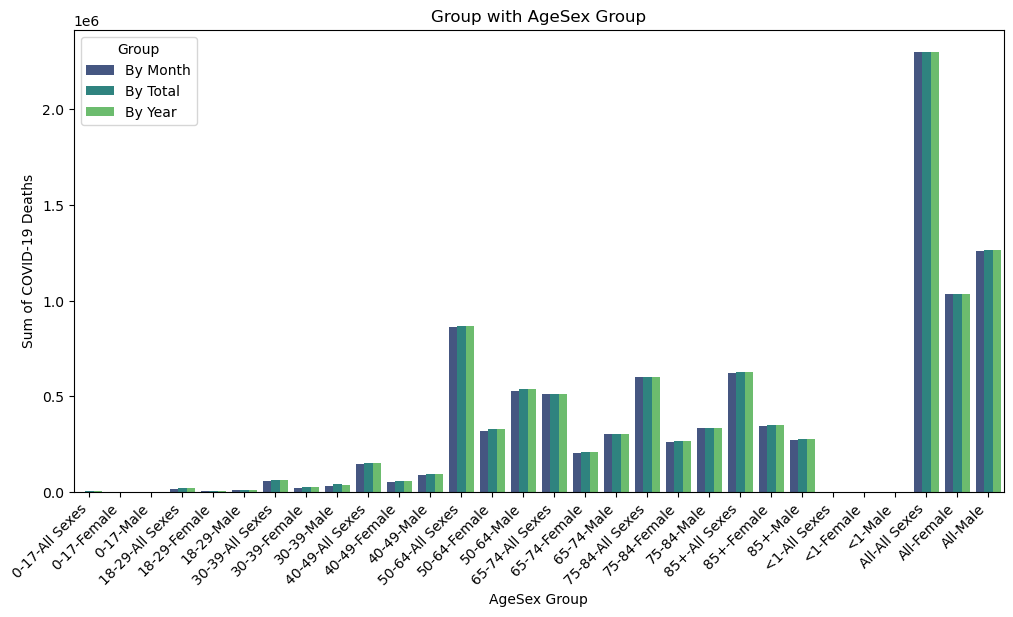

In [86]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeSex Group', y='COVID-19 Deaths', hue='Group', data=grouped_data, palette='viridis')
plt.title('Group with AgeSex Group')
plt.xlabel('AgeSex Group')
plt.ylabel('Sum of COVID-19 Deaths')
plt.xticks(rotation=45, ha='right')
plt.show()



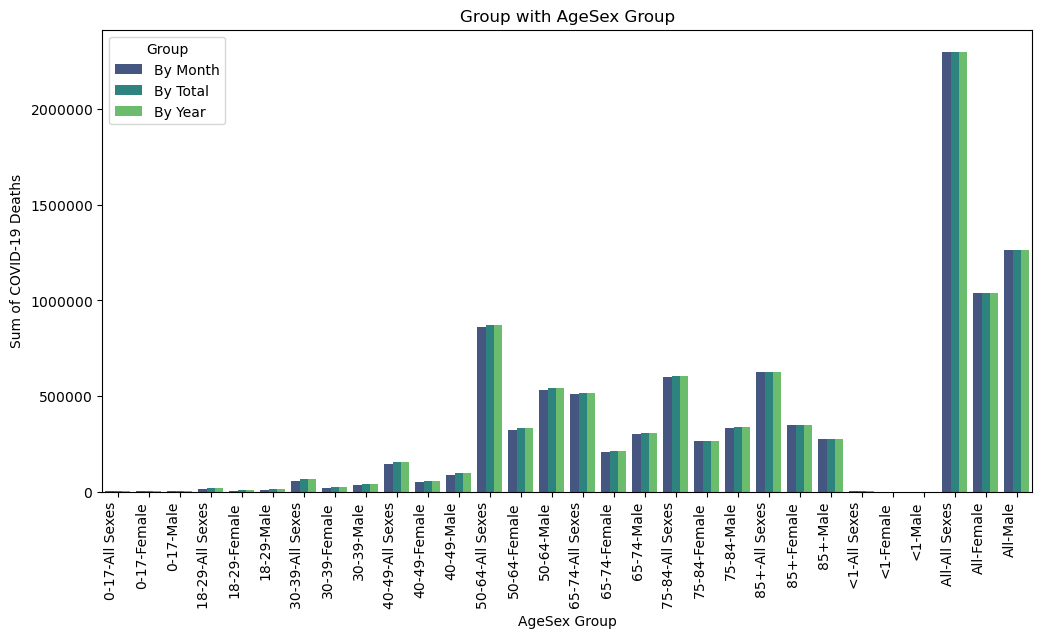

In [87]:
# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='AgeSex Group', y='COVID-19 Deaths', hue='Group', data=grouped_data, palette='viridis')

# Set Y-axis labels as integers
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)

plt.title('Group with AgeSex Group')
plt.xlabel('AgeSex Group')
plt.ylabel('Sum of COVID-19 Deaths')
plt.xticks(rotation=90, ha='right')
plt.show()


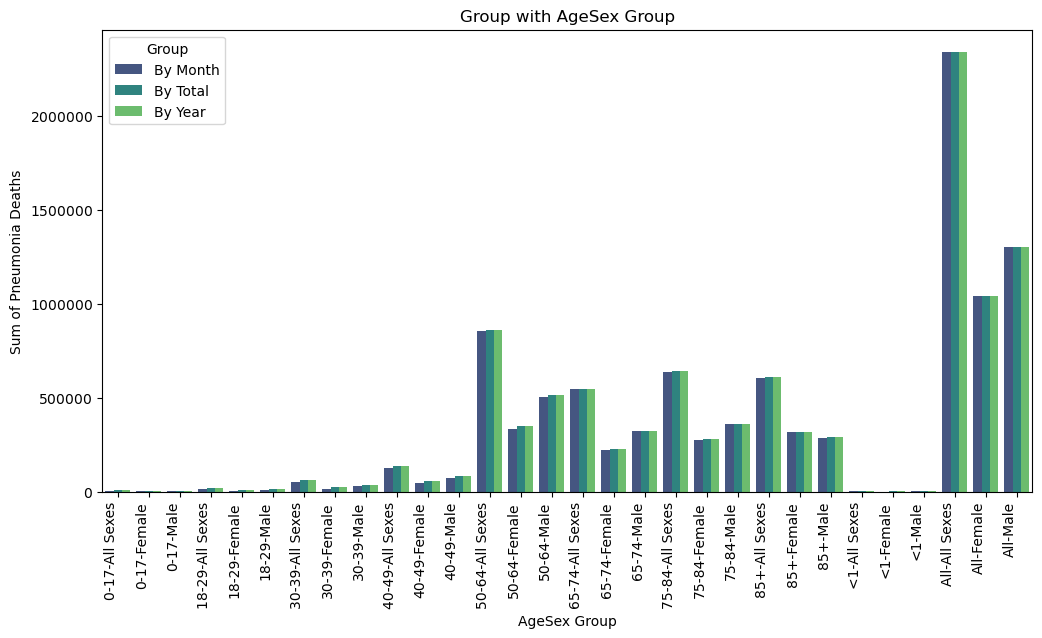

In [88]:
# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='AgeSex Group', y='Pneumonia Deaths', hue='Group', data=grouped_data, palette='viridis')

# Set Y-axis labels as integers
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)

plt.title('Group with AgeSex Group')
plt.xlabel('AgeSex Group')
plt.ylabel('Sum of Pneumonia Deaths')
plt.xticks(rotation=90, ha='right')
plt.show()

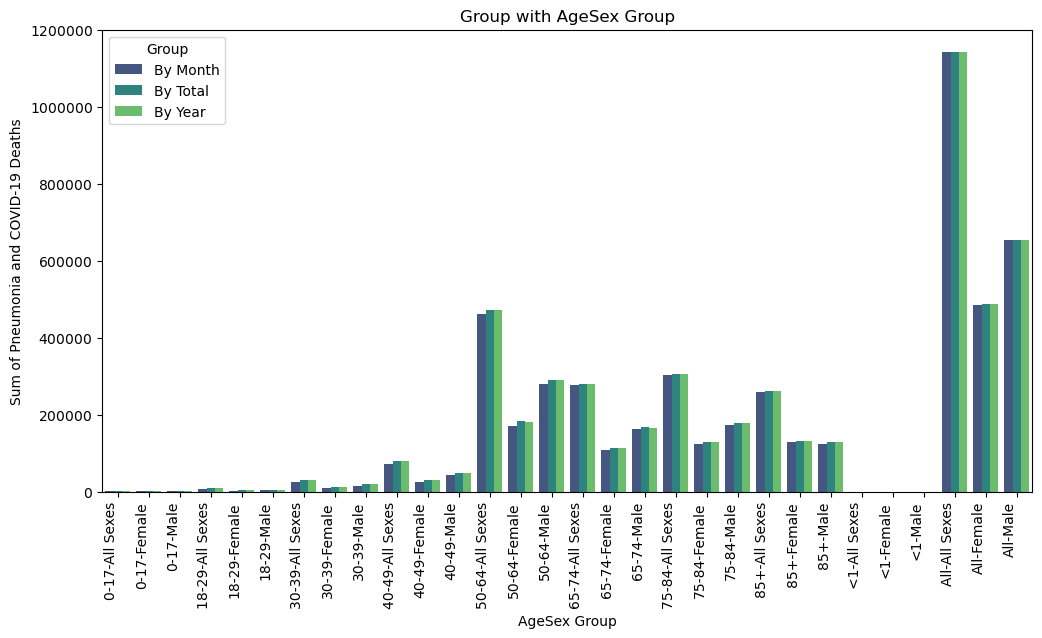

In [92]:
# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='AgeSex Group', y='Pneumonia and COVID-19 Deaths', hue='Group', data=grouped_data, palette='viridis')

# Set Y-axis labels as integers
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)

plt.title('Group with AgeSex Group')
plt.xlabel('AgeSex Group')
plt.ylabel('Sum of Pneumonia and COVID-19 Deaths')
plt.xticks(rotation=90, ha='right')
plt.show()

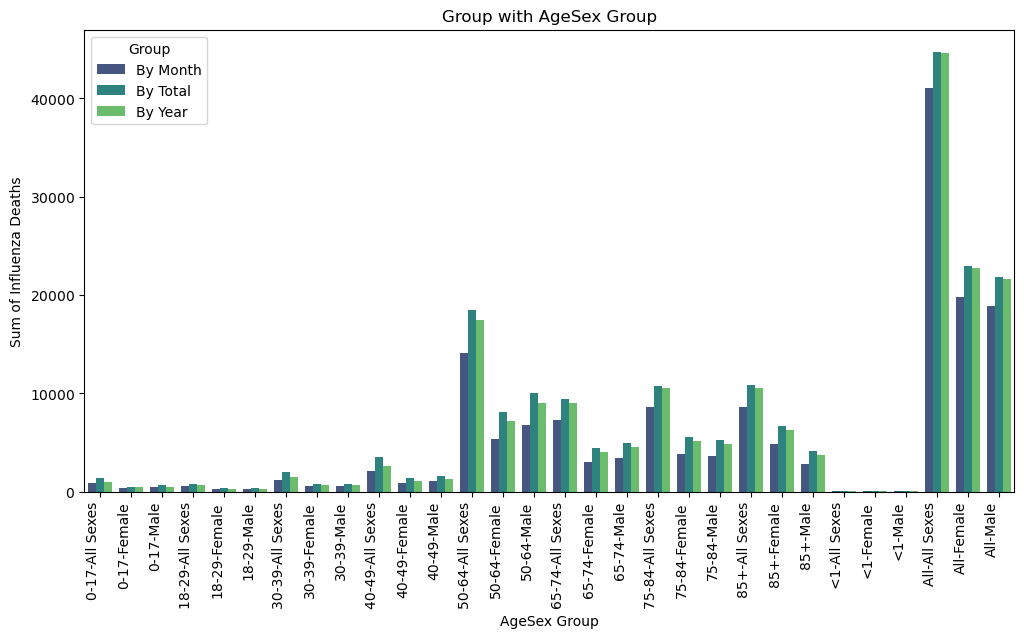

In [93]:
# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='AgeSex Group', y='Influenza Deaths', hue='Group', data=grouped_data, palette='viridis')

# Set Y-axis labels as integers
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)

plt.title('Group with AgeSex Group')
plt.xlabel('AgeSex Group')
plt.ylabel('Sum of Influenza Deaths')
plt.xticks(rotation=90, ha='right')
plt.show()

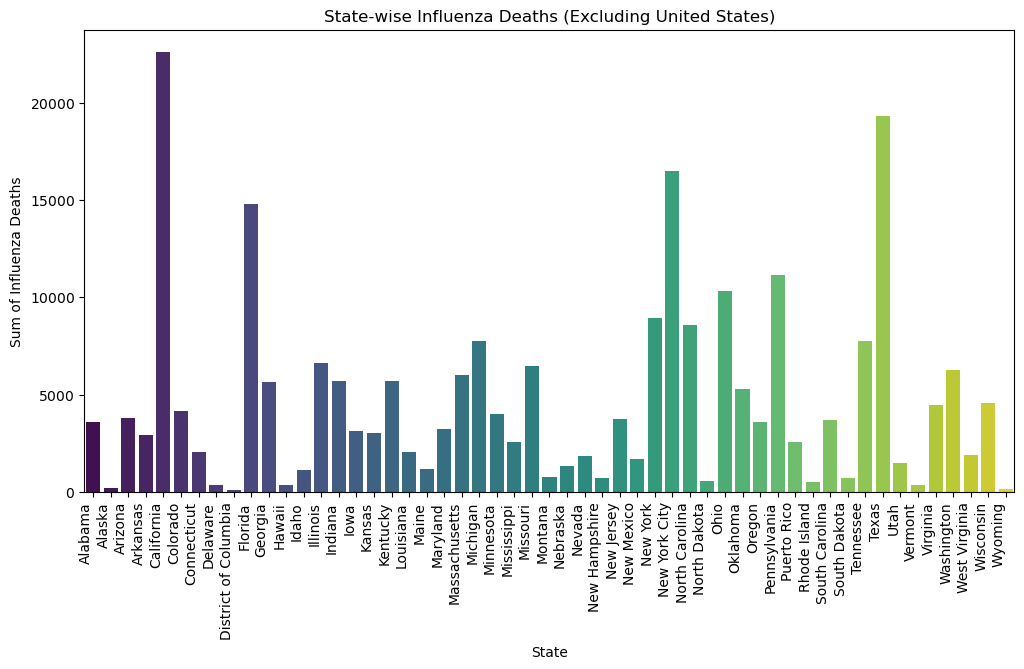

In [96]:
# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='State', y='Influenza Deaths', data=grouped_data, palette='viridis')

# Set Y-axis labels as integers
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)

plt.title('State-wise Influenza Deaths (Excluding United States)')
plt.xlabel('State')
plt.ylabel('Sum of Influenza Deaths')
plt.xticks(rotation=90, ha='right')
plt.show()


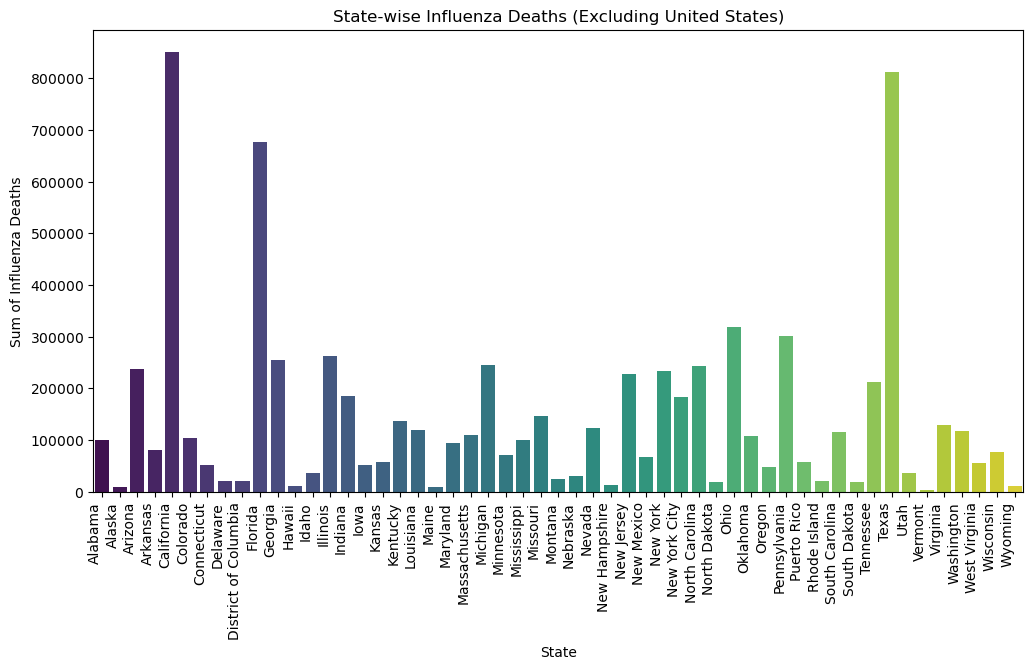

In [98]:
# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='State', y='Pneumonia and COVID-19 Deaths', data=grouped_data, palette='viridis')

# Set Y-axis labels as integers
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)

plt.title('State-wise Influenza Deaths (Excluding United States)')
plt.xlabel('State')
plt.ylabel('Sum of Influenza Deaths')
plt.xticks(rotation=90, ha='right')
plt.show()


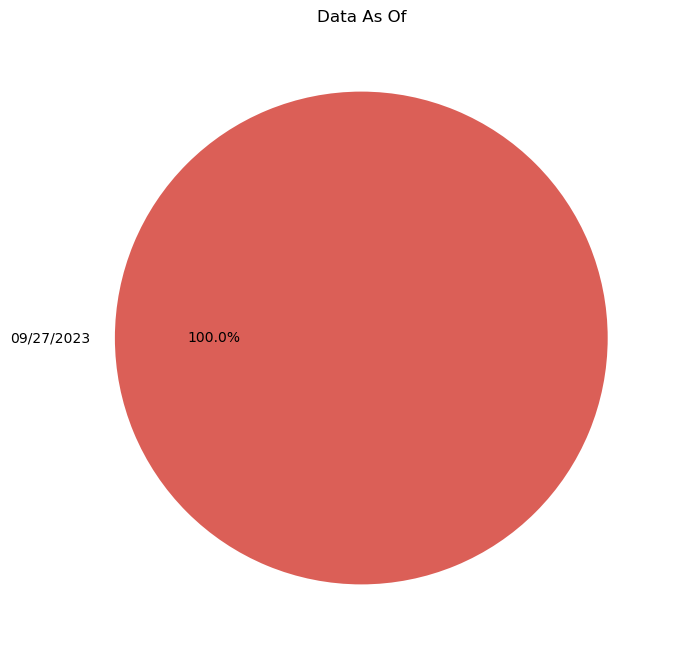

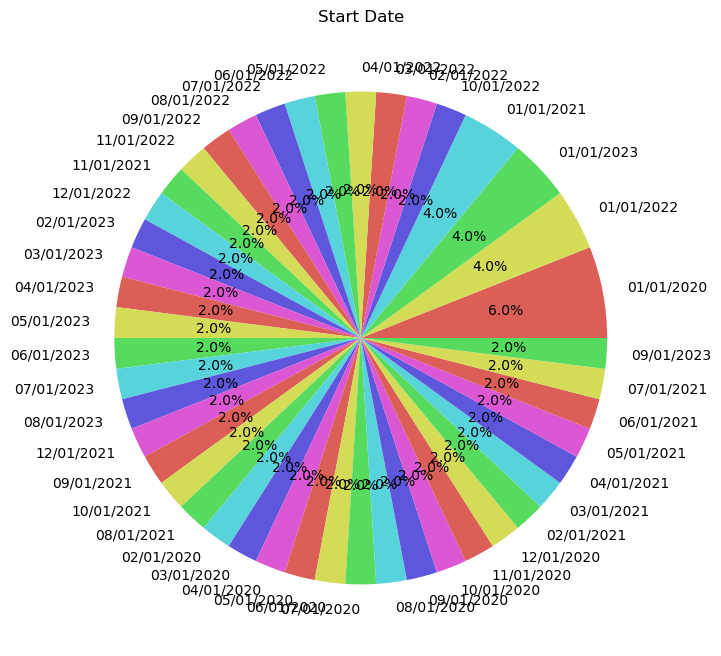

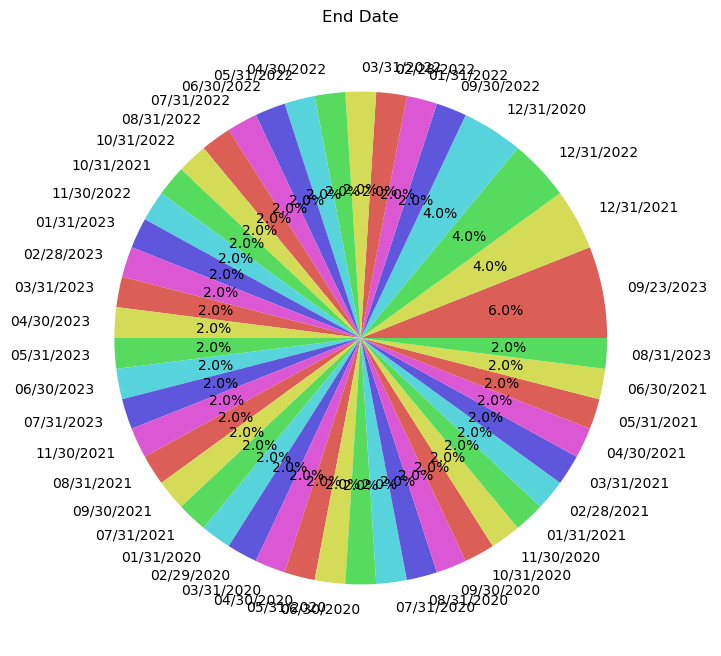

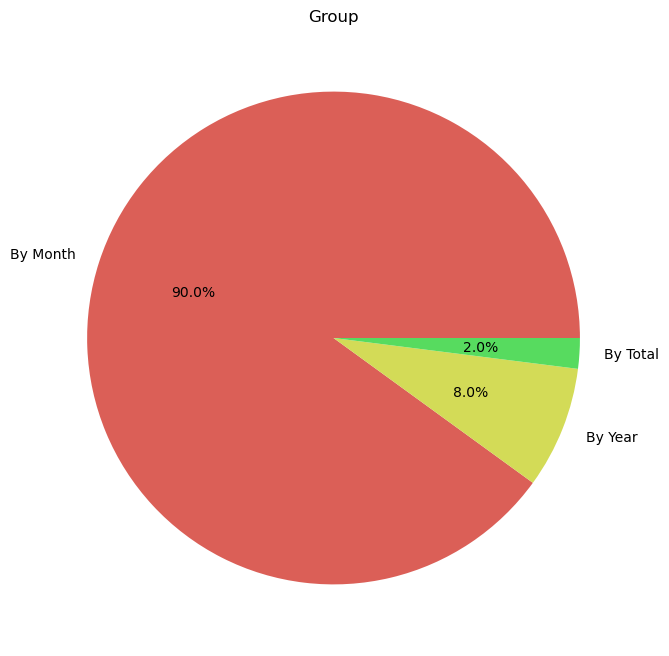

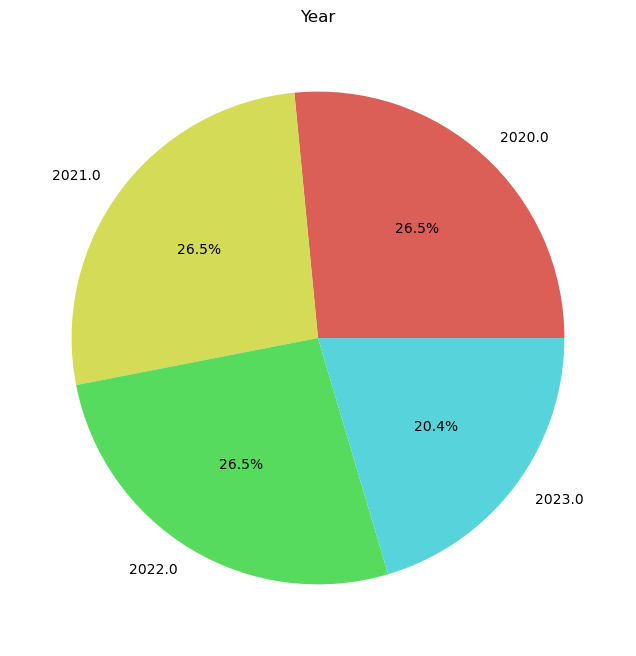

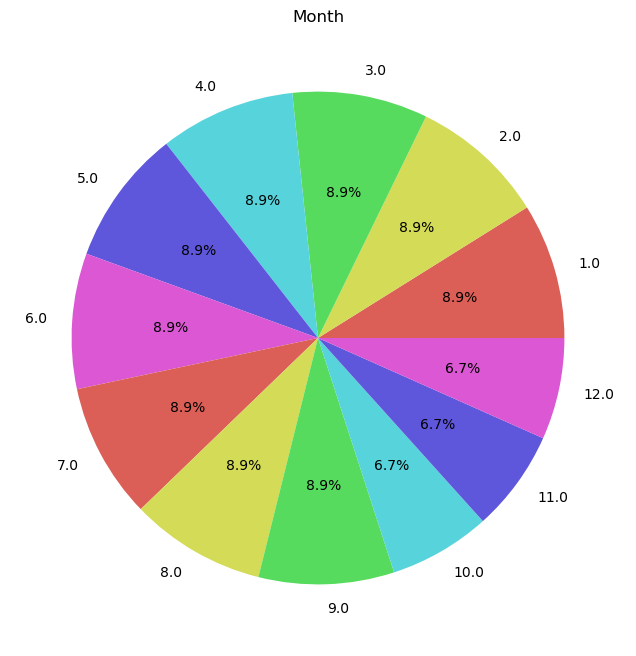

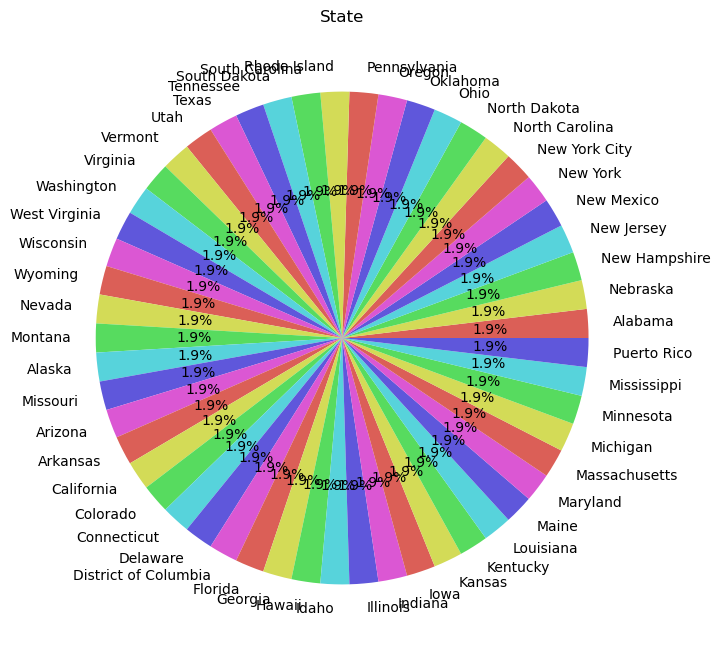

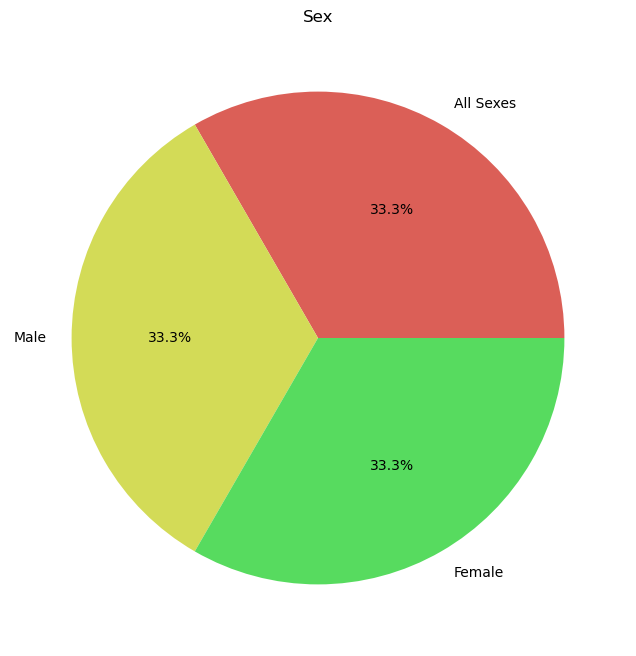

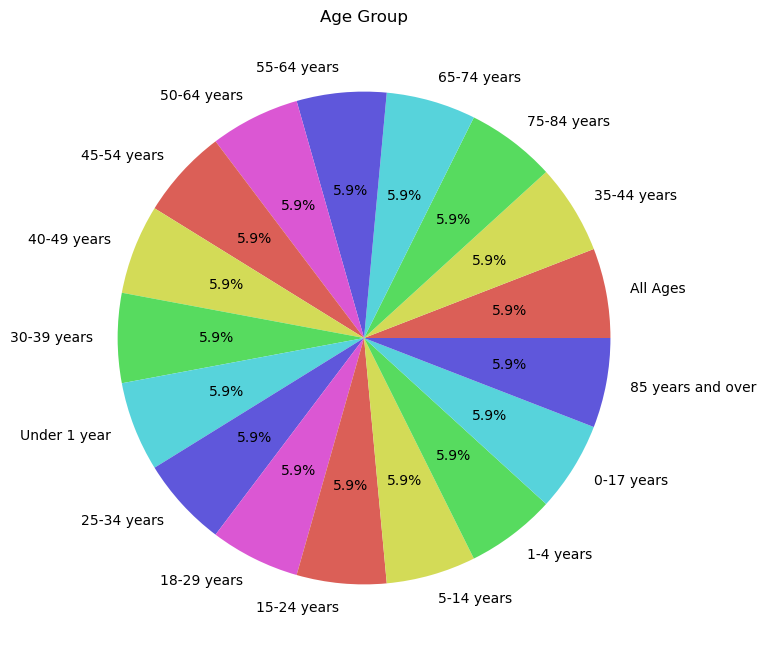

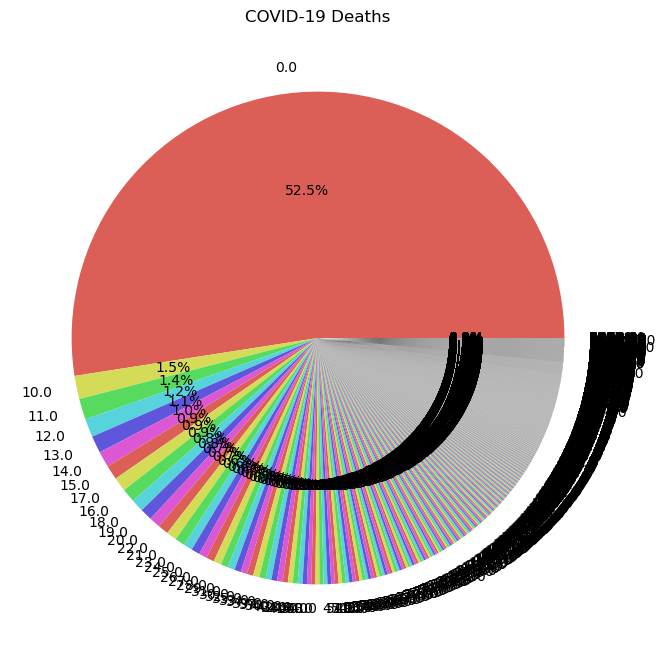

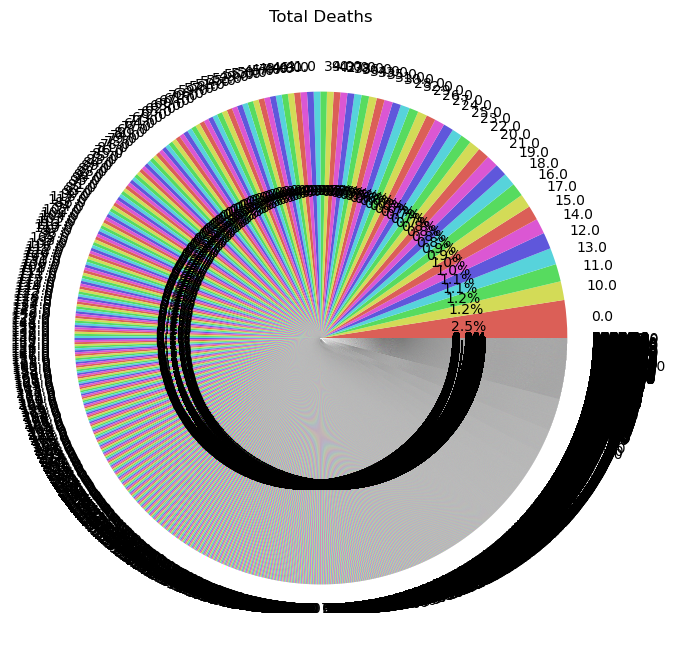

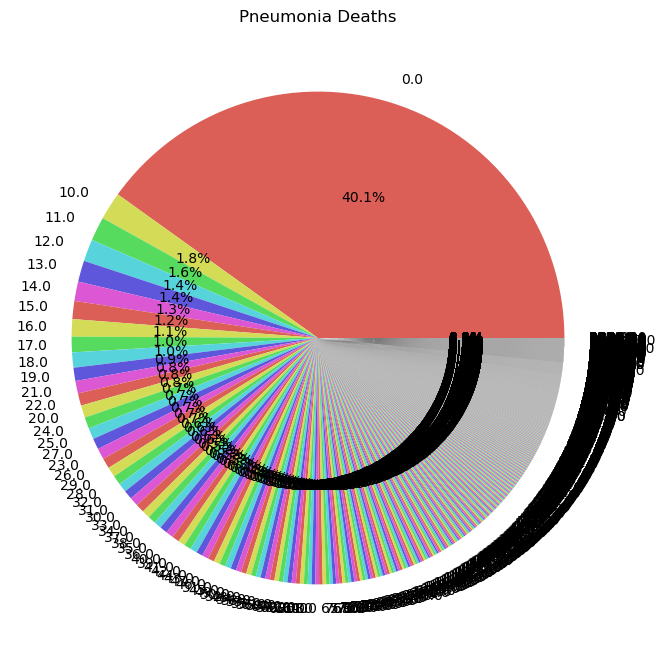

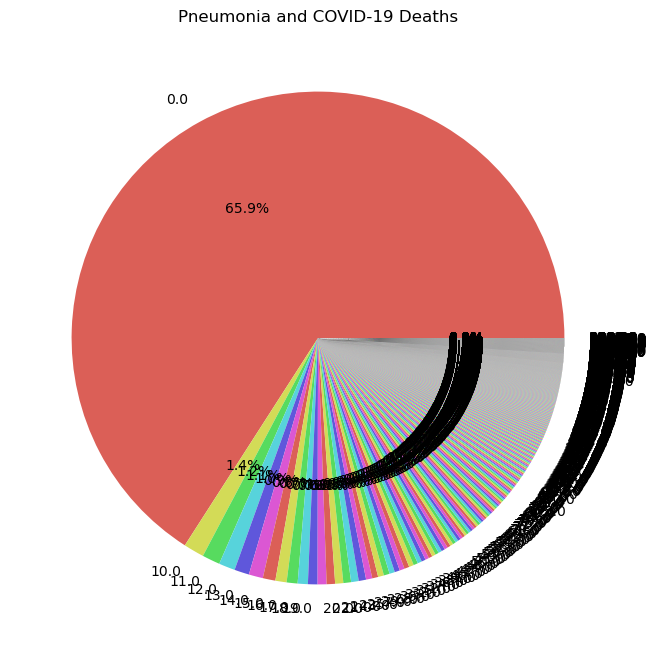

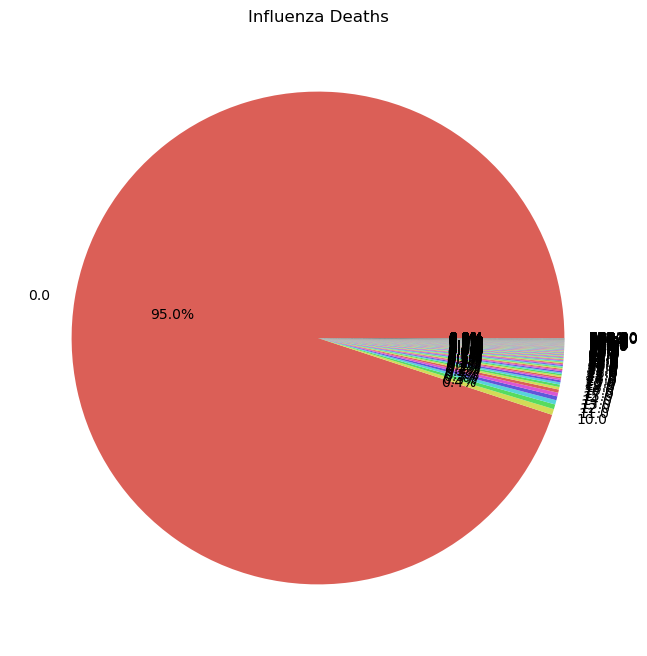

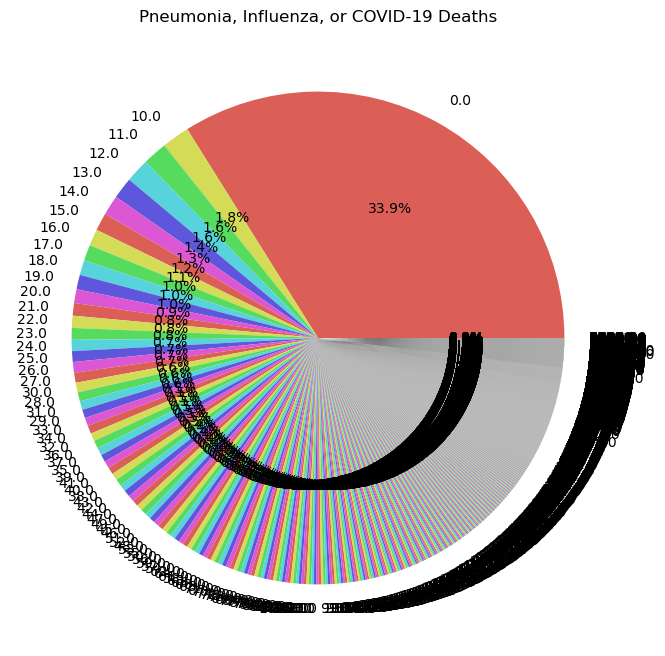

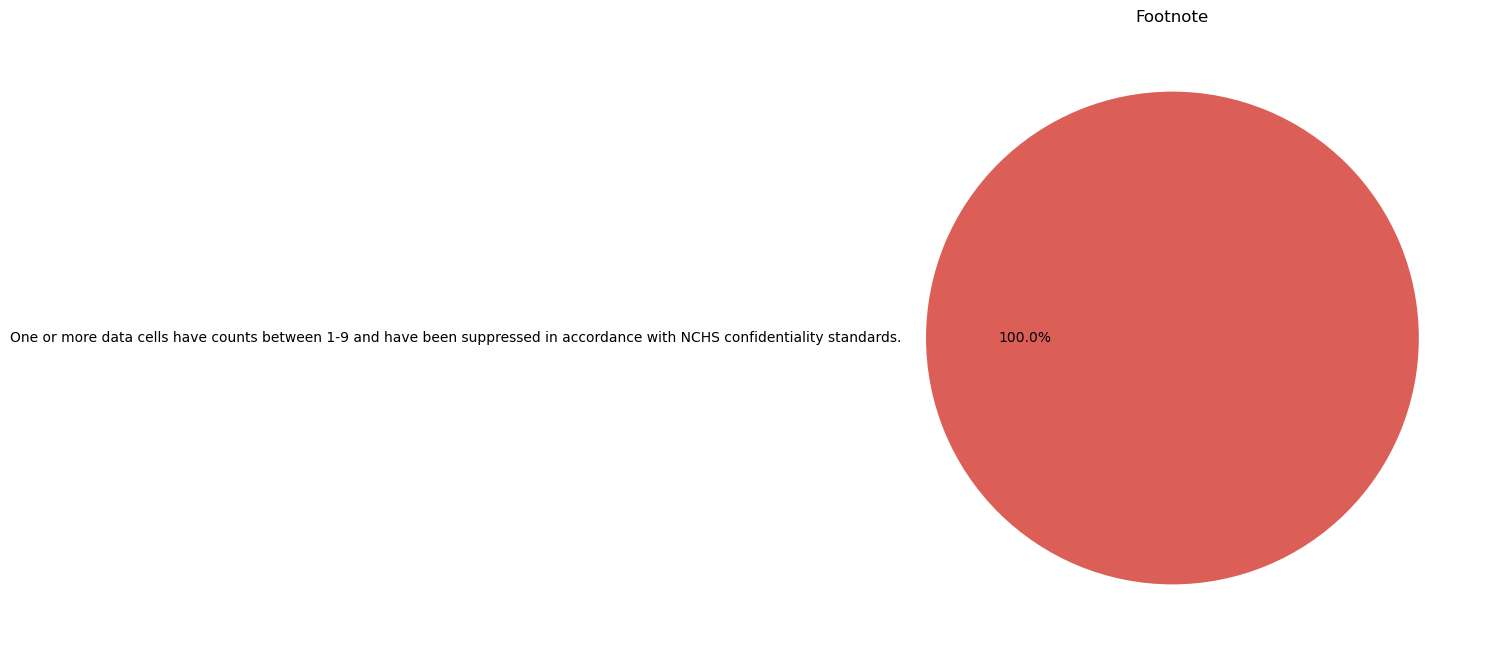

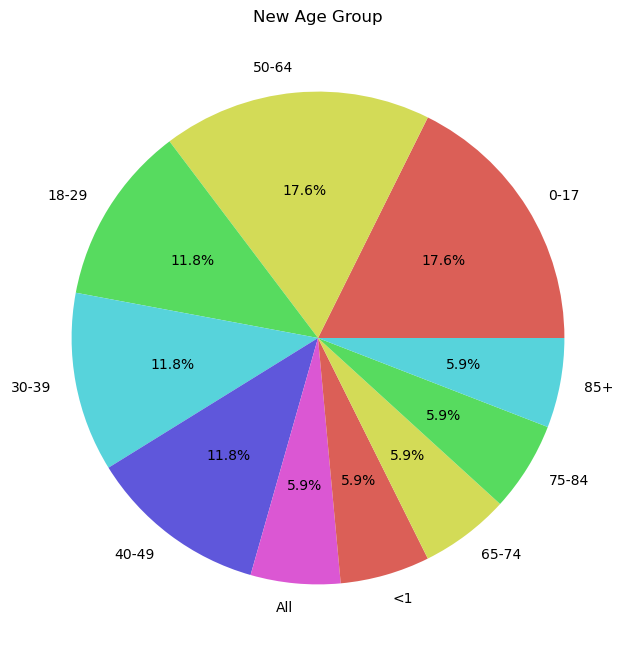

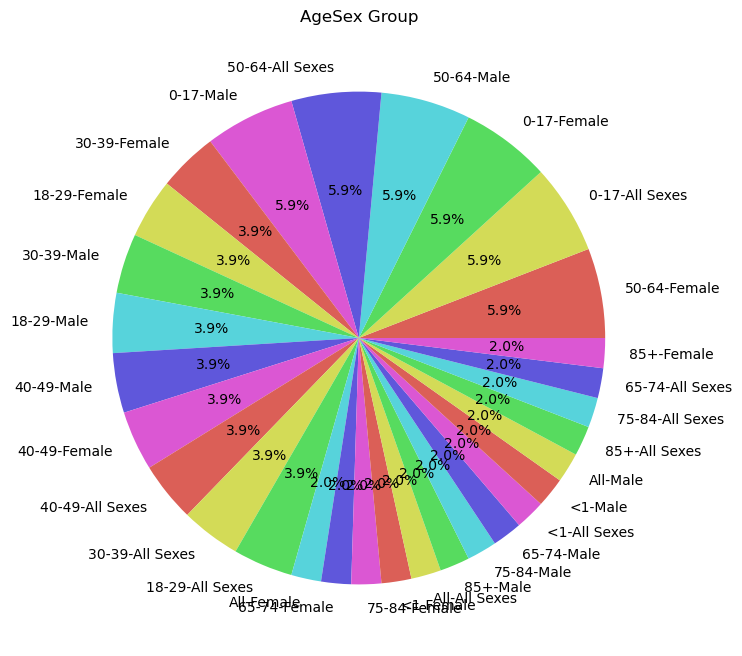

In [102]:
# Assuming df is your DataFrame
filtered_data = df[df['State'] != 'United States']

# Loop through the columns in filtered_data
for i in filtered_data.columns:
    plt.figure(figsize=(20, 8))
    counts = filtered_data[i].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
    plt.title(i)
    plt.show()


No data available for 2020. Skipping.
No data available for 2021. Skipping.
No data available for 2022. Skipping.


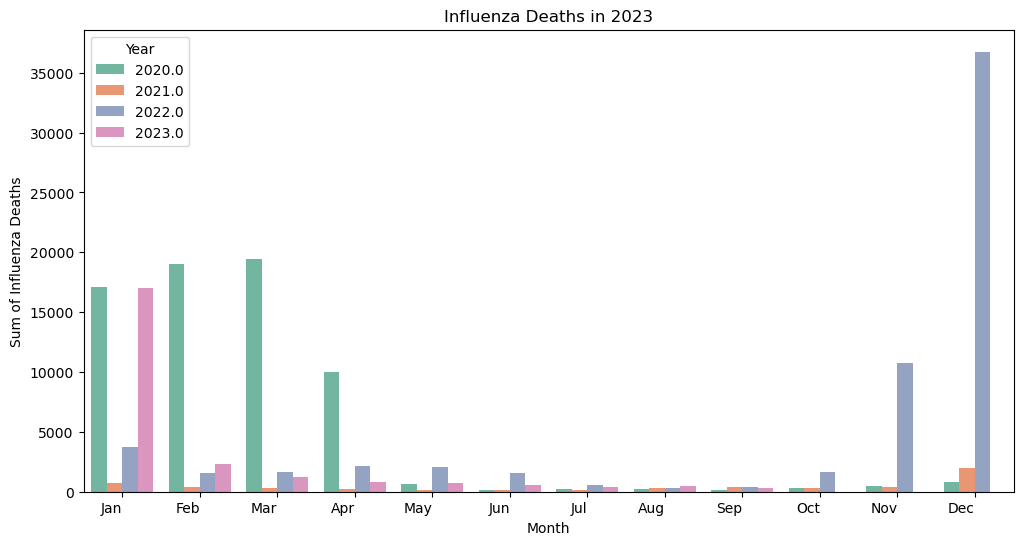

In [128]:
# Convert 'Data As Of' to datetime
df['Data As Of'] = pd.to_datetime(df['Data As Of'])

# Define the years you want to visualize
years_to_visualize = [2020, 2021, 2022, 2023]

# Loop through the years
for year in years_to_visualize:
    # Filter data for 'Influenza Deaths' and the current year
    influenza_data_year = df[(df['Data As Of'].dt.year == year)]

    # Check if there is data for the current year
    if influenza_data_year.empty:
        print(f"No data available for {year}. Skipping.")
        continue

    # Group by 'Year' and 'Month' and calculate the sum of 'Influenza Deaths'
    grouped_data_year = influenza_data_year.groupby(['Year', 'Month'])['Influenza Deaths'].sum().reset_index()

    # Additional checks
    if 'Month' not in grouped_data_year.columns or grouped_data_year['Month'].empty:
        print(f"Warning: No data available for 'Month' in the grouped data for {year}. Skipping.")
        continue

    # Replace numeric month values with month names
    grouped_data_year['Month'] = grouped_data_year['Month'].apply(lambda x: calendar.month_abbr[int(x)])

    # Create a bar plot for the current year with a different color palette
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Month', y='Influenza Deaths', data=grouped_data_year, hue='Year', palette='Set2')

    plt.title(f'Influenza Deaths in {year}')
    plt.xlabel('Month')
    plt.ylabel('Sum of Influenza Deaths')
    plt.xticks(rotation=0, ha='right')

    # Format legend for the year (remove decimal)
    plt.legend(title='Year')

    plt.show()


No data available for 2020. Skipping.
No data available for 2021. Skipping.
No data available for 2022. Skipping.


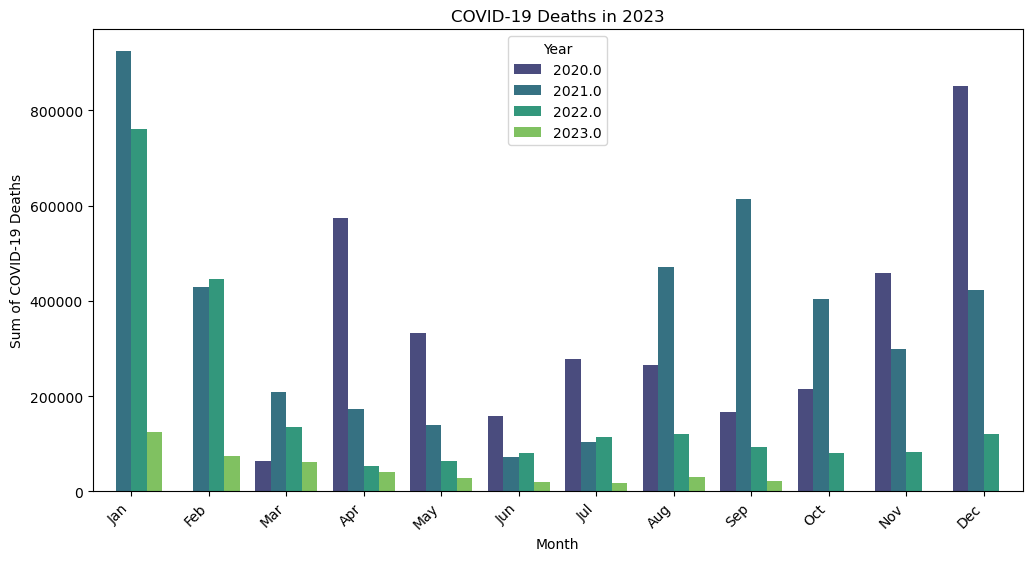

In [125]:
# Convert 'Data As Of' to datetime
df['Data As Of'] = pd.to_datetime(df['Data As Of'])

# Define the years you want to visualize
years_to_visualize = [2020, 2021, 2022, 2023]

# Loop through the years
for year in years_to_visualize:
    # Filter data for 'COVID-19 Deaths' and the current year
    covid_data_year = df[(df['Data As Of'].dt.year == year)]

    # Check if there is data for the current year
    if covid_data_year.empty:
        print(f"No data available for {year}. Skipping.")
        continue

    # Group by 'Year' and 'Month' and calculate the sum of 'COVID-19 Deaths'
    grouped_data_year = covid_data_year.groupby(['Year', 'Month'])['COVID-19 Deaths'].sum().reset_index()

    # Additional checks
    if 'Month' not in grouped_data_year.columns or grouped_data_year['Month'].empty:
        print(f"Warning: No data available for 'Month' in the grouped data for {year}. Skipping.")
        continue

    # Replace numeric month values with month names
    grouped_data_year['Month'] = grouped_data_year['Month'].apply(lambda x: calendar.month_abbr[int(x)])

    # Create a bar plot for the current year
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Month', y='COVID-19 Deaths', data=grouped_data_year, hue='Year', palette='viridis')

    plt.title(f'COVID-19 Deaths in {year}')
    plt.xlabel('Month')
    plt.ylabel('Sum of COVID-19 Deaths')
    plt.xticks(rotation=45, ha='right')

    # Format legend for the year (remove decimal)
    plt.legend(title='Year')

    plt.show()


No data available for 2020. Skipping.
No data available for 2021. Skipping.
No data available for 2022. Skipping.


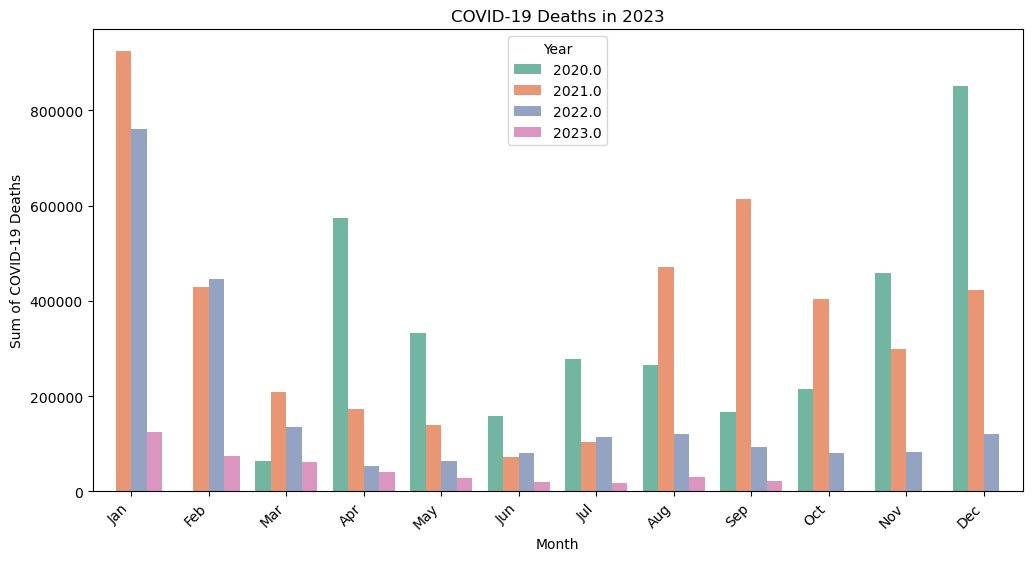

In [126]:
df['Data As Of'] = pd.to_datetime(df['Data As Of'])

# Define the years you want to visualize
years_to_visualize = [2020, 2021, 2022, 2023]

# Loop through the years
for year in years_to_visualize:
    # Filter data for 'COVID-19 Deaths' and the current year
    covid_data_year = df[(df['Data As Of'].dt.year == year)]

    # Check if there is data for the current year
    if covid_data_year.empty:
        print(f"No data available for {year}. Skipping.")
        continue

    # Group by 'Year' and 'Month' and calculate the sum of 'COVID-19 Deaths'
    grouped_data_year = covid_data_year.groupby(['Year', 'Month'])['COVID-19 Deaths'].sum().reset_index()

    # Additional checks
    if 'Month' not in grouped_data_year.columns or grouped_data_year['Month'].empty:
        print(f"Warning: No data available for 'Month' in the grouped data for {year}. Skipping.")
        continue

    # Replace numeric month values with month names
    grouped_data_year['Month'] = grouped_data_year['Month'].apply(lambda x: calendar.month_abbr[int(x)])

    # Create a bar plot for the current year with a different color palette
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Month', y='COVID-19 Deaths', data=grouped_data_year, hue='Year', palette='Set2')

    plt.title(f'COVID-19 Deaths in {year}')
    plt.xlabel('Month')
    plt.ylabel('Sum of COVID-19 Deaths')
    plt.xticks(rotation=45, ha='right')

    # Format legend for the year (remove decimal)
    plt.legend(title='Year')

    plt.show()


No data available for 2020. Skipping.
No data available for 2021. Skipping.
No data available for 2022. Skipping.


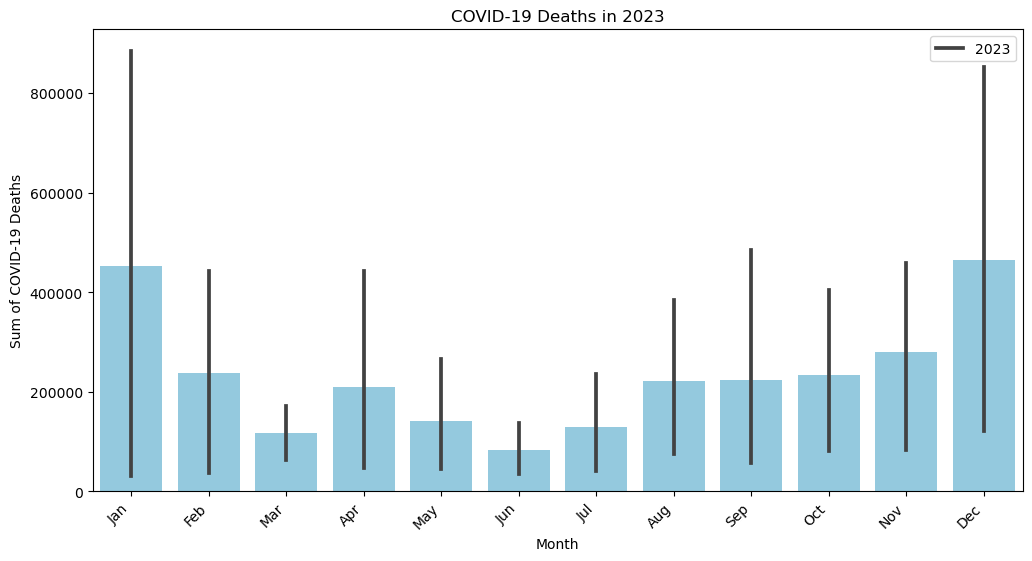

In [121]:
df['Data As Of'] = pd.to_datetime(df['Data As Of'])

# Define the years you want to visualize
years_to_visualize = [2020, 2021, 2022, 2023]

# Loop through the years
for year in years_to_visualize:
    # Filter data for 'COVID-19 Deaths' and the current year
    covid_data_year = df[(df['Data As Of'].dt.year == year)]

    # Check if there is data for the current year
    if covid_data_year.empty:
        print(f"No data available for {year}. Skipping.")
        continue

    # Group by 'Year' and 'Month' and calculate the sum of 'COVID-19 Deaths'
    grouped_data_year = covid_data_year.groupby(['Year', 'Month'])['COVID-19 Deaths'].sum().reset_index()

    # Additional checks
    if 'Month' not in grouped_data_year.columns or grouped_data_year['Month'].empty:
        print(f"Warning: No data available for 'Month' in the grouped data for {year}. Skipping.")
        continue

    # Replace numeric month values with month names
    grouped_data_year['Month'] = grouped_data_year['Month'].apply(lambda x: calendar.month_abbr[int(x)])

    # Create a bar plot for the current year
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Month', y='COVID-19 Deaths', data=grouped_data_year, color='skyblue')

    plt.title(f'COVID-19 Deaths in {year}')
    plt.xlabel('Month')
    plt.ylabel('Sum of COVID-19 Deaths')
    plt.xticks(rotation=45, ha='right')

    # Set legend for the year
    plt.legend([f'{year}'])

    plt.show()
